In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc

In [2]:
df = pd.read_csv("kidney_log_fold.csv")
df

,Dataset,DCN,LPAR1,COL1A1,CXCL14,CXCL12,CFH,EPO
0,9df60c57-fdf3-4e93-828e-fe9303f20438,2.628890,4.819206,4.285223,-0.231340,0.555553,4.278850,NaN
1,bd65a70f-b274-4133-b9dd-0d1431b6af34,10.293924,4.395403,6.907635,1.419778,5.323344,5.483872,-18.090435
2,fd072bc3-2dfb-46f8-b4e3-467cb3223182,6.632027,4.243050,5.788991,-3.013833,2.746137,2.945528,-16.430780
3,e067e5ca-e53e-485f-aa8e-efd5435229c8,4.396560,5.860149,4.561864,-3.982944,0.369497,4.031883,NaN
4,98e5ea9f-16d6-47ec-a529-686e76515e39,10.495075,6.241800,8.378448,5.872031,3.979041,5.946630,0.000000
5,48b37086-25f7-4ecd-be66-f5bb378e3aea,11.322045,6.958237,10.009762,6.325933,5.903008,6.524586,NaN
6,2adb1f8a-a6b1-4909-8ee8-484814e2d4bf,5.809235,4.470998,5.865983,-4.749966,3.271617,4.029191,0.000000
7,32b9bdce-2481-4c85-ba1b-6ad5fcea844c,10.086470,4.658594,8.556964,0.633964,2.611105,5.281176,NaN
8,0b75c598-0893-4216-afe8-5414cab7739d,5.121826,4.238430,5.136005,-1.671541,2.075195,3.429973,NaN
9,42bb7f78-cef8-4b0d-9bba-50037d64d8c1,4.527140,5.466176,3.583951,NaN,3.470263,7.099382,NaN


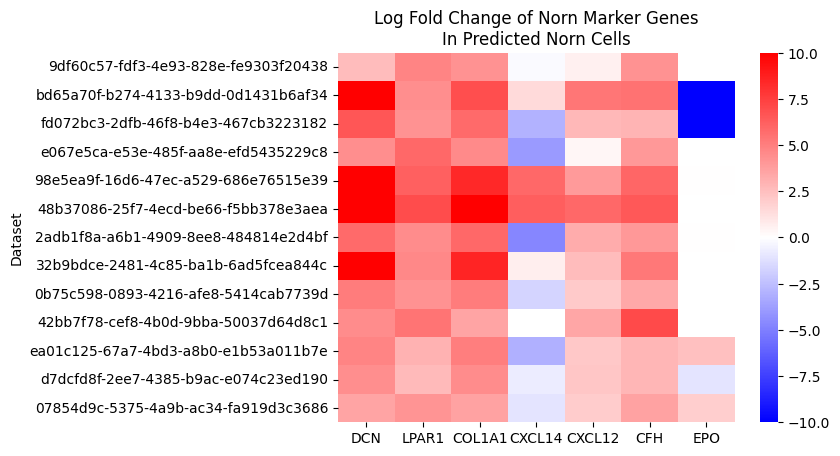

In [3]:
sns.heatmap(df.set_index("Dataset"), cmap="bwr", vmax=10, vmin=-10)
plt.title("Log Fold Change of Norn Marker Genes\nIn Predicted Norn Cells");

In [4]:
import cellxgene_census

In [5]:
census = cellxgene_census.open_soma()
census_datasets = census["census_info"]["datasets"].read().concat().to_pandas()

# for convenience, indexing on the soma_joinid which links this to other census data.
census_datasets = census_datasets.set_index("soma_joinid")

The "stable" release is currently 2023-07-25. Specify 'census_version="2023-07-25"' in future calls to open_soma() to ensure data consistency.


In [6]:
df["dataset_title"] = census_datasets.set_index("dataset_id").loc[df.Dataset].dataset_title.values
df_to_plot = df.drop(columns=["Dataset", "dataset_title"])
df_to_plot["Num"] = np.arange(1, 14)

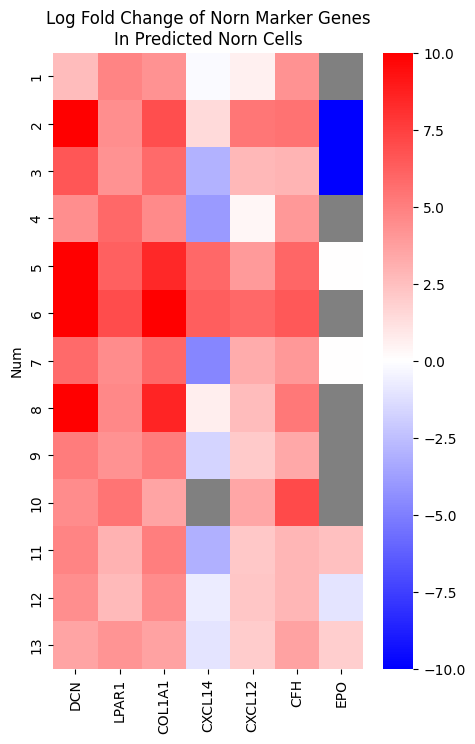

In [7]:
plt.figure(figsize=(5, 8))
g = sns.heatmap(df_to_plot.set_index("Num"), cmap="bwr", vmax=10, vmin=-10)
plt.title("Log Fold Change of Norn Marker Genes\nIn Predicted Norn Cells");
g.set_facecolor('grey')
plt.xticks(rotation=90);

plt.savefig("figures/kidney_heatmap.svg")

# Lung

In [8]:
df = pd.read_csv("lung_log_fold.csv")
df

,Dataset,DCN,LPAR1,COL1A1,CXCL14,CXCL12,CFH,EPO
0,3dc61ca1-ce40-46b6-8337-f27260fd9a03,4.642592,3.144897,4.724436,0.707202,2.640067,1.942805,-2.397337
1,4b6af54a-4a21-46e0-bc8d-673c0561a836,7.302271,4.420657,4.153185,4.382422,1.586514,4.602108,NaN
2,047d57f2-4d14-45de-aa98-336c6f583750,2.205215,2.391592,3.413807,3.228193,-0.528253,3.410664,NaN
3,d8da613f-e681-4c69-b463-e94f5e66847f,6.763616,3.145313,6.162160,1.978461,4.502715,4.062209,1.281259
4,e04daea4-4412-45b5-989e-76a9be070a89,12.989058,3.200529,7.434977,6.221959,4.243046,5.280844,NaN
5,9f222629-9e39-47d0-b83f-e08d610c7479,8.294362,3.128705,6.765862,3.455019,4.611886,3.417740,1.416789


In [9]:
df["dataset_title"] = census_datasets.set_index("dataset_id").loc[df.Dataset].dataset_title.values
df_to_plot = df.drop(columns=["Dataset", "dataset_title"])
df_to_plot["Num"] = np.arange(1, 7)

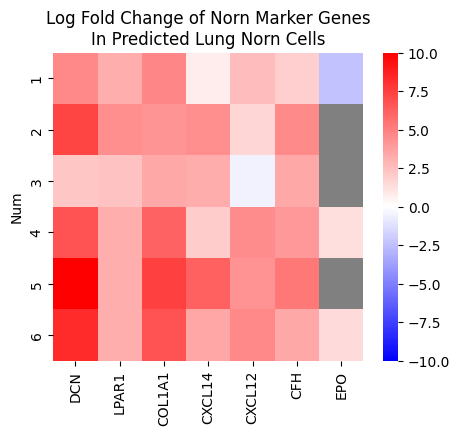

In [10]:
plt.figure(figsize=(5, 4))
g = sns.heatmap(df_to_plot.set_index("Num"), cmap="bwr", vmax=10, vmin=-10)
plt.title("Log Fold Change of Norn Marker Genes\nIn Predicted Lung Norn Cells");
g.set_facecolor('grey')
plt.xticks(rotation=90);

plt.savefig("figures/lung_heatmap.svg")

In [11]:
df_to_plot_lung = df_to_plot

# Heart

In [12]:
df = pd.read_csv("heart_log_fold.csv")
df

,Dataset,DCN,LPAR1,COL1A1,CXCL14,CXCL12,CFH,EPO
0,1c739a3e-c3f5-49d5-98e0-73975e751201,2.404364,2.849958,2.056193,1.200469,1.420879,2.915321,NaN
1,f15e263b-6544-46cb-a46e-e33ab7ce8347,3.360555,3.095630,3.223115,2.046741,2.548409,2.412277,NaN
2,5500c673-1610-40a0-86d9-64d987ae50e6,4.737737,2.351582,3.608104,-0.731437,0.291612,-0.040973,-18.703957
3,d4e69e01-3ba2-4d6b-a15d-e7048f78f22e,4.676494,4.440032,2.739548,4.457934,1.511183,3.919349,1.279541
4,65badd7a-9262-4fd1-9ce2-eb5dc0ca8039,4.484646,3.878911,2.733363,4.125556,0.775803,4.418466,0.681427
5,48b37086-25f7-4ecd-be66-f5bb378e3aea,7.519783,6.034153,7.711624,3.750880,2.487714,3.478358,NaN


In [13]:
df["dataset_title"] = census_datasets.set_index("dataset_id").loc[df.Dataset].dataset_title.values
df_to_plot = df.drop(columns=["Dataset", "dataset_title"])
df_to_plot["Num"] = np.arange(1, 7)

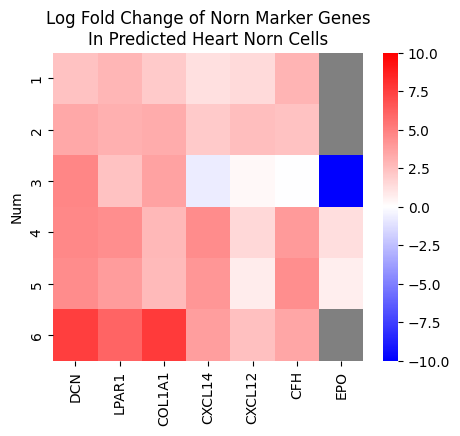

In [14]:
plt.figure(figsize=(5, 4))
g = sns.heatmap(df_to_plot.set_index("Num"), cmap="bwr", vmax=10, vmin=-10)
plt.title("Log Fold Change of Norn Marker Genes\nIn Predicted Heart Norn Cells");
g.set_facecolor('grey')
plt.xticks(rotation=90);

plt.savefig("figures/heart_heatmap.svg")

In [15]:
df_to_plot_heart = df_to_plot

# Make them Joint

In [16]:
df_to_plot = pd.concat((df_to_plot_lung, df_to_plot_heart.iloc[[0], :], df_to_plot_heart)).set_index("Num")

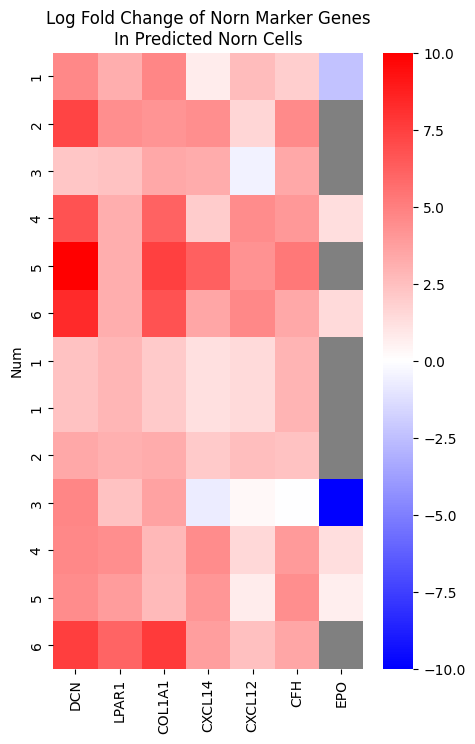

In [17]:
plt.figure(figsize=(5, 8))
g = sns.heatmap(df_to_plot, cmap="bwr", vmax=10, vmin=-10)
plt.title("Log Fold Change of Norn Marker Genes\nIn Predicted Norn Cells");
g.set_facecolor('grey')
plt.xticks(rotation=90);

plt.savefig("figures/hrtlng_heatmap.svg")

# Make the Kam20 one

In [18]:
df_to_plot = pd.read_csv("kam20_log_fold.csv").drop(columns=("Dataset"))
df_to_plot["num"] = 1
df_to_plot = pd.concat([df_to_plot for i in range(13)])

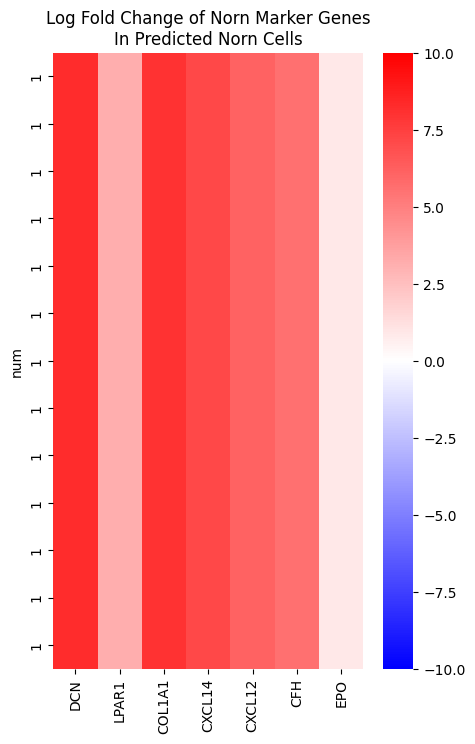

In [19]:
plt.figure(figsize=(5, 8))
g = sns.heatmap(df_to_plot.set_index("num"), cmap="bwr", vmax=10, vmin=-10)
plt.title("Log Fold Change of Norn Marker Genes\nIn Predicted Norn Cells");
g.set_facecolor('grey')
plt.xticks(rotation=90);

plt.savefig("figures/kam20_heatmap.svg")

# Make the New Ones

In [38]:
df = pd.read_csv("kidney_log_fold_new.csv")
df

,Dataset,SLC12A1,UMOD,EGF,KLK1,SLC12A3,TMEM52B,ATP1A1,ABCA13,ALDH1L1,...,IGFBP5,SFRP2,MFGE8,GATA3,RGS5,CALD1,REN1,AKR1B7,TPM2,MYLK
0,9df60c57-fdf3-4e93-828e-fe9303f20438,-1.869453,-2.618829,-3.288711,0.198528,-5.350026,-3.311846,-2.037070,-20.895367,-1.992549,...,1.036105,NaN,4.097310,-26.922571,NaN,5.593321,NaN,NaN,3.772355,0.939910
1,bd65a70f-b274-4133-b9dd-0d1431b6af34,-21.736195,-21.168901,-18.904821,-21.220860,-20.840488,-22.965309,0.134453,NaN,-22.861689,...,3.042822,9.415514,3.647906,-1.472395,NaN,4.434150,NaN,NaN,4.478073,2.743721
2,fd072bc3-2dfb-46f8-b4e3-467cb3223182,-24.929012,NaN,-22.777597,-22.127865,-21.194237,-24.902899,-0.891751,-20.931847,-4.487026,...,3.057860,3.753955,1.283403,-1.822653,NaN,2.435316,NaN,NaN,2.000192,2.373768
3,e067e5ca-e53e-485f-aa8e-efd5435229c8,-4.233940,-4.732426,-4.296168,-2.671728,-4.768946,-4.347973,-2.947282,-23.802645,-3.961221,...,0.390135,-18.576542,5.147676,-2.481748,NaN,5.158033,NaN,NaN,3.557869,2.237449
4,98e5ea9f-16d6-47ec-a529-686e76515e39,-0.335311,-0.792637,-1.711825,-0.212532,-1.204922,-2.365393,-3.073149,-1.207306,-3.337405,...,-0.193921,4.728282,3.847833,1.573748,2.445701,3.522197,27.452511,-23.239538,3.647769,0.941610
5,48b37086-25f7-4ecd-be66-f5bb378e3aea,-2.712879,-1.748375,-2.777889,-1.851129,-2.095061,NaN,-2.395150,-4.138892,-2.889974,...,1.548097,5.684756,2.638877,-2.918421,0.996767,4.113407,-21.338991,-23.015104,3.568703,1.752764
6,2adb1f8a-a6b1-4909-8ee8-484814e2d4bf,-4.129409,-26.949606,-22.960878,-23.236620,-24.187872,-25.896713,-3.045526,-18.368645,-23.445292,...,1.219149,5.208951,2.409146,-1.824008,NaN,1.996193,NaN,NaN,2.679154,0.684816
7,32b9bdce-2481-4c85-ba1b-6ad5fcea844c,-4.192425,-3.589794,-4.940026,-3.618694,-3.484736,-8.266937,-2.262348,-21.459658,-4.243007,...,2.541865,6.688994,4.345200,-2.847130,NaN,4.390576,NaN,NaN,4.029705,2.032779
8,0b75c598-0893-4216-afe8-5414cab7739d,-2.974592,-2.115073,-3.950906,-22.356791,-3.356835,-3.921130,-2.609511,-1.472471,-2.769981,...,1.413899,2.810175,3.549689,-2.646256,NaN,4.325005,NaN,NaN,2.726539,1.062650
9,42bb7f78-cef8-4b0d-9bba-50037d64d8c1,0.298440,0.176243,-1.019661,-0.157622,-1.984730,-1.799600,-1.089058,-1.094278,-1.951191,...,0.123596,NaN,1.533128,-1.807203,1.546731,4.658420,-2.090759,2.530124,3.534369,3.736360


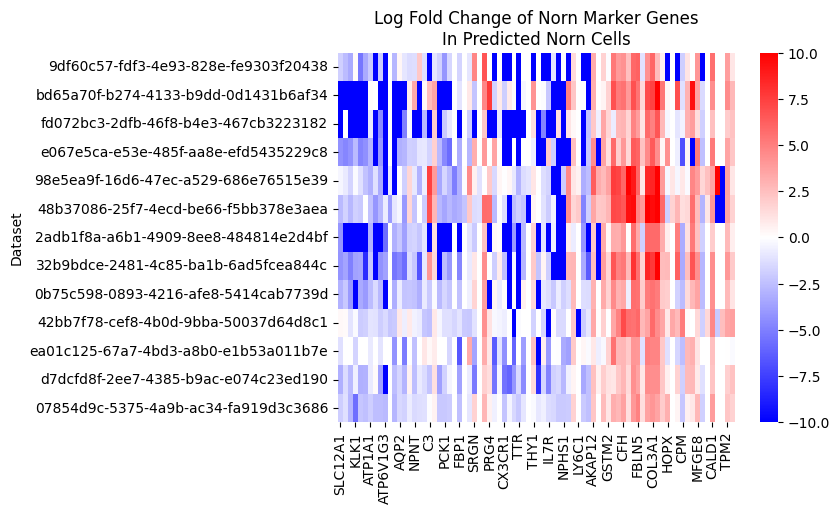

In [39]:
sns.heatmap(df.set_index("Dataset"), cmap="bwr", vmax=10, vmin=-10)
plt.title("Log Fold Change of Norn Marker Genes\nIn Predicted Norn Cells");

In [40]:
import cellxgene_census

In [41]:
census = cellxgene_census.open_soma()
census_datasets = census["census_info"]["datasets"].read().concat().to_pandas()

# for convenience, indexing on the soma_joinid which links this to other census data.
census_datasets = census_datasets.set_index("soma_joinid")

The "stable" release is currently 2023-07-25. Specify 'census_version="2023-07-25"' in future calls to open_soma() to ensure data consistency.


In [42]:
df["dataset_title"] = census_datasets.set_index("dataset_id").loc[df.Dataset].dataset_title.values
df_to_plot = df.drop(columns=["Dataset", "dataset_title"])
df_to_plot["Num"] = np.arange(1, 14)

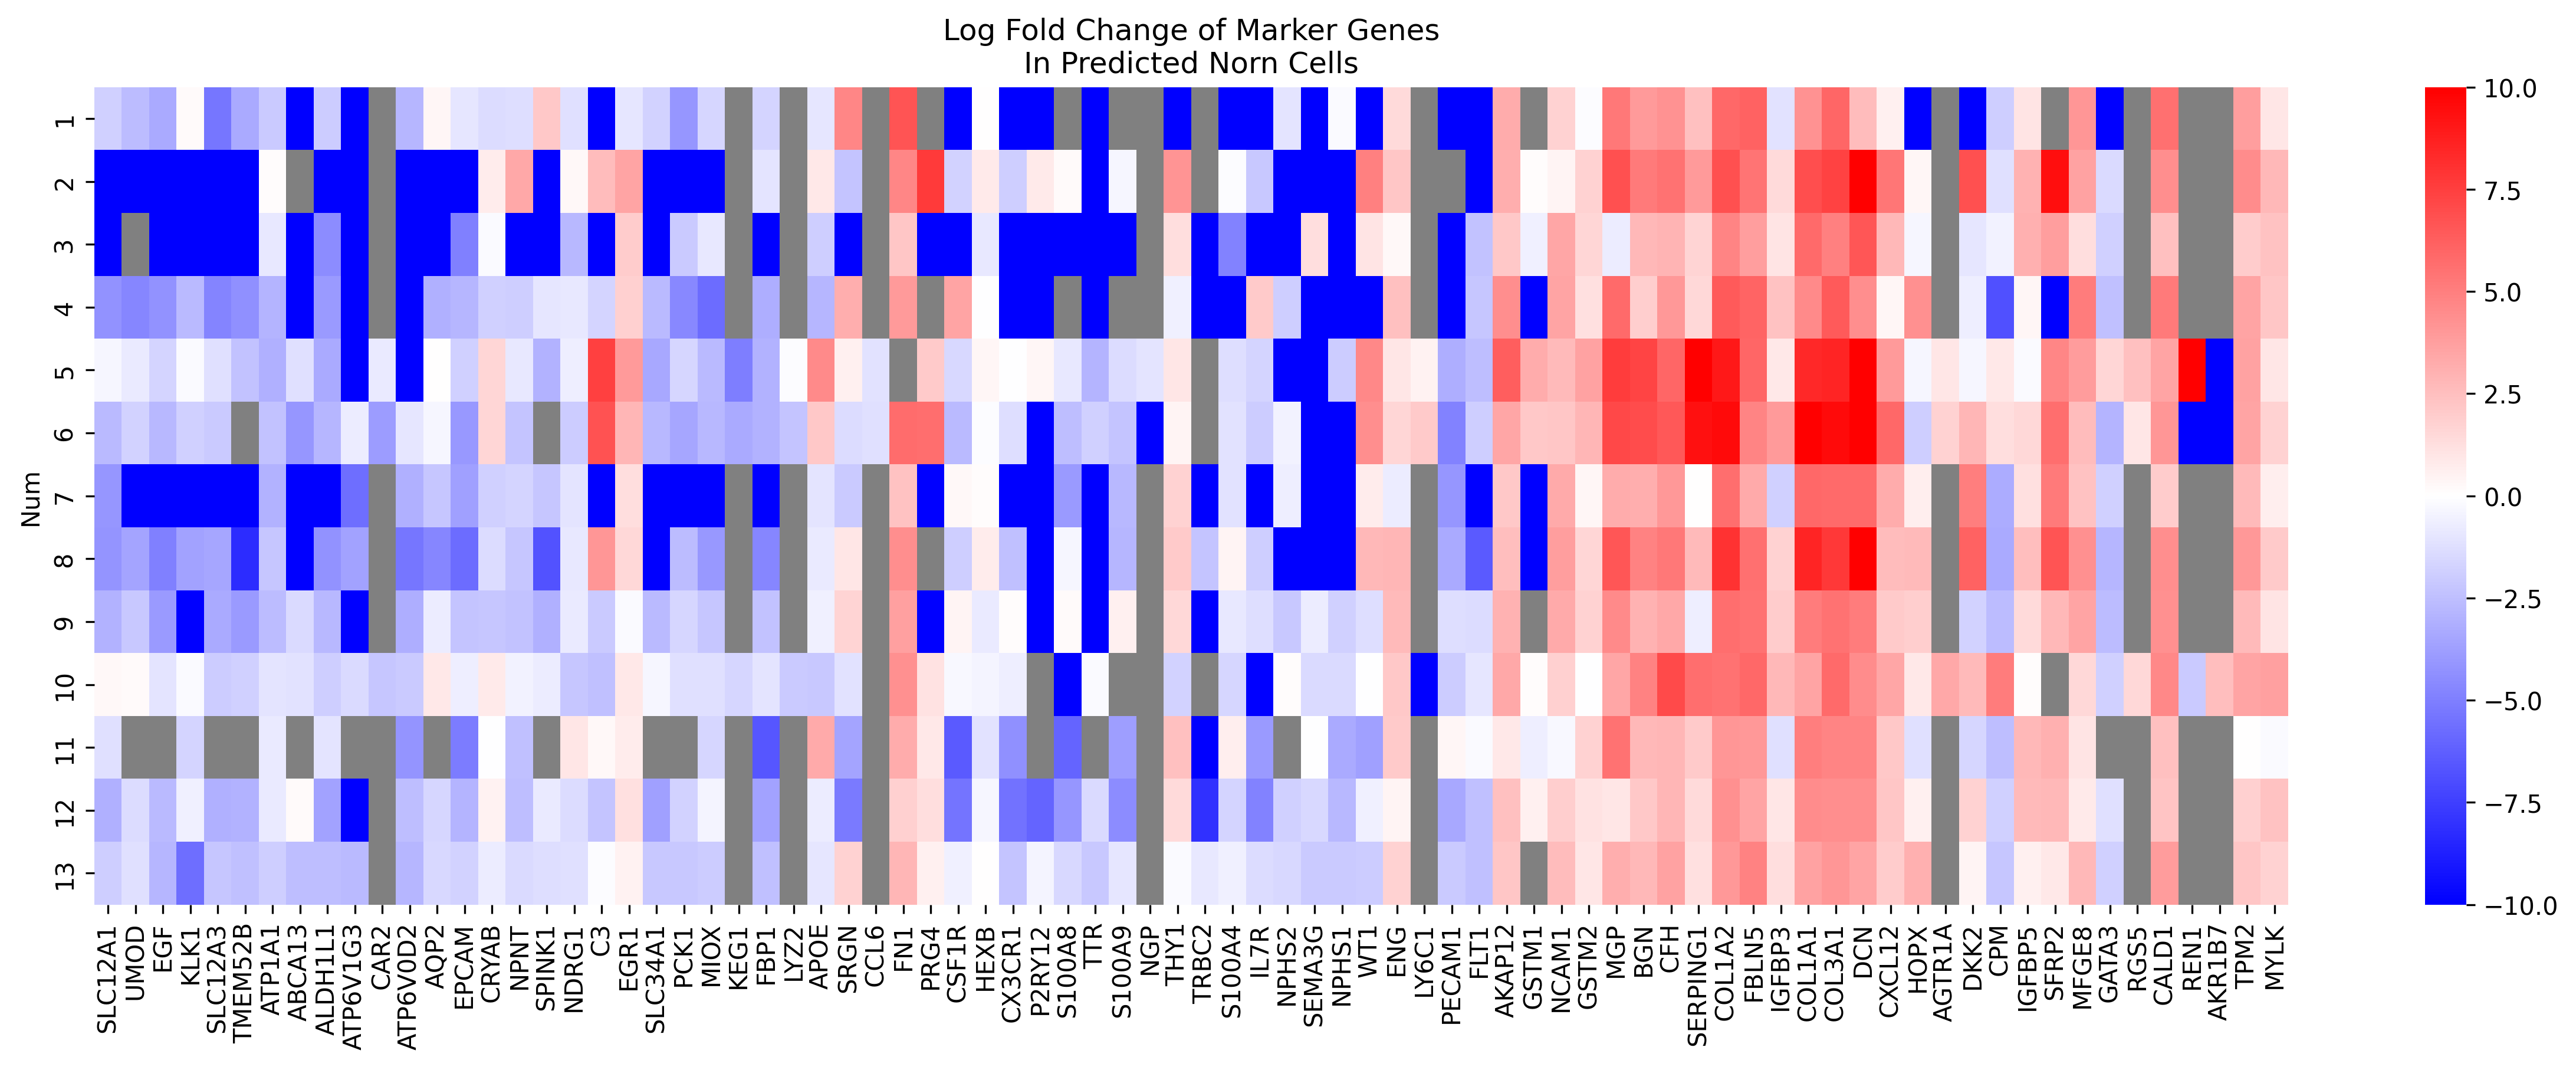

In [43]:
plt.figure(figsize=(20, 6), dpi=300)
g = sns.heatmap(df_to_plot.set_index("Num"), cmap="bwr", vmax=10, vmin=-10)
plt.title("Log Fold Change of Marker Genes\nIn Predicted Norn Cells");
g.set_facecolor('grey')
plt.xticks(rotation=90);

plt.savefig("figures/kidney_heatmap_new.svg")

# Lung

In [23]:
df = pd.read_csv("lung_log_fold_new.csv")
df

,Dataset,SLC12A1,UMOD,EGF,KLK1,SLC12A3,TMEM52B,ATP1A1,ABCA13,ALDH1L1,...,IGFBP5,SFRP2,MFGE8,GATA3,RGS5,CALD1,REN1,AKR1B7,TPM2,MYLK
0,3dc61ca1-ce40-46b6-8337-f27260fd9a03,NaN,NaN,-2.901964,-4.556675,-4.069592,-3.020097,-0.931185,-6.231247,-2.764837,...,0.123773,1.673969,1.080024,-6.359337,NaN,1.622189,NaN,NaN,0.926253,1.511645
1,4b6af54a-4a21-46e0-bc8d-673c0561a836,NaN,NaN,-3.023335,-1.169750,NaN,-0.192698,-1.051188,-4.107197,3.253098,...,2.289443,6.184304,1.896456,-2.015300,NaN,2.086558,NaN,NaN,1.469471,2.176959
2,047d57f2-4d14-45de-aa98-336c6f583750,-16.512039,NaN,0.764740,-19.155636,NaN,-1.913007,-1.403302,-2.087705,1.417975,...,0.519150,0.092235,0.270593,-2.913265,0.476483,0.981066,-0.043382,-2.588485,1.270330,1.838399
3,d8da613f-e681-4c69-b463-e94f5e66847f,1.481997,-0.026974,-3.445526,-1.891373,-1.862944,-2.809988,-0.568611,-7.312309,1.819882,...,2.891376,6.583148,2.760198,-3.511938,NaN,3.814602,NaN,NaN,2.970750,4.373518
4,e04daea4-4412-45b5-989e-76a9be070a89,0.076141,-22.275673,-2.335155,0.978582,-2.106663,-23.846764,-1.409776,-3.337779,-0.398393,...,2.327029,8.106420,3.656186,-5.230642,NaN,5.344991,NaN,NaN,4.068324,3.230294
5,9f222629-9e39-47d0-b83f-e08d610c7479,-0.333397,1.415804,-2.752149,1.660671,-1.839626,-5.021979,-0.733789,-6.863593,0.185722,...,3.188788,7.686712,3.522597,-3.867136,NaN,4.443035,NaN,NaN,3.542632,3.444914


In [24]:
df["dataset_title"] = census_datasets.set_index("dataset_id").loc[df.Dataset].dataset_title.values
df_to_plot = df.drop(columns=["Dataset", "dataset_title"])
df_to_plot["Num"] = np.arange(1, 7)

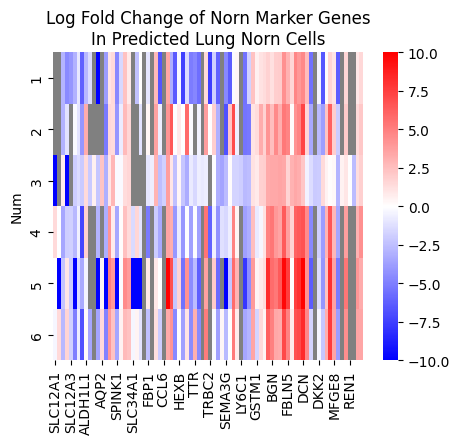

In [26]:
plt.figure(figsize=(5, 4))
g = sns.heatmap(df_to_plot.set_index("Num"), cmap="bwr", vmax=10, vmin=-10)
plt.title("Log Fold Change of Norn Marker Genes\nIn Predicted Lung Norn Cells");
g.set_facecolor('grey')
plt.xticks(rotation=90);

plt.savefig("figures/lung_heatmap_new.svg")

In [27]:
df_to_plot_lung = df_to_plot

# Heart

In [29]:
df = pd.read_csv("heart_log_fold_new.csv")
df

,Dataset,SLC12A1,UMOD,EGF,KLK1,SLC12A3,TMEM52B,ATP1A1,ABCA13,ALDH1L1,...,IGFBP5,SFRP2,MFGE8,GATA3,RGS5,CALD1,REN1,AKR1B7,TPM2,MYLK
0,1c739a3e-c3f5-49d5-98e0-73975e751201,0.954910,NaN,-2.457819,0.494814,-1.337253,-1.035173,-0.028894,-1.080297,-1.620195,...,0.226270,1.272756,0.469319,-2.087110,NaN,0.334441,NaN,NaN,-0.781761,-0.911657
1,f15e263b-6544-46cb-a46e-e33ab7ce8347,NaN,NaN,-2.849814,0.788666,NaN,NaN,0.138850,-2.175078,0.677640,...,-0.104173,1.456281,1.251029,-2.394232,NaN,1.320035,NaN,NaN,1.034516,-1.375088
2,5500c673-1610-40a0-86d9-64d987ae50e6,-17.830275,NaN,-21.363150,-0.255861,-17.920986,-2.828200,-1.088815,-1.844733,-3.171288,...,-0.797307,0.403007,0.523738,-1.080640,NaN,0.970125,NaN,NaN,-0.197236,-1.836451
3,d4e69e01-3ba2-4d6b-a15d-e7048f78f22e,1.538782,0.506612,-3.200406,-1.388931,0.458030,0.692093,0.144406,0.406770,-0.391137,...,-0.004096,1.349924,0.281256,-3.322256,NaN,-0.219459,NaN,NaN,-1.674876,-2.326344
4,65badd7a-9262-4fd1-9ce2-eb5dc0ca8039,1.089580,0.089986,-3.947614,0.206608,-0.208764,0.321178,0.624298,-0.227673,-0.915787,...,1.745237,-0.197676,0.806466,-2.847162,NaN,-0.103004,NaN,NaN,-1.514846,-2.562750
5,48b37086-25f7-4ecd-be66-f5bb378e3aea,-6.372154,-5.712320,-5.258724,-4.897031,-6.509766,NaN,-0.781828,-6.375850,-3.267452,...,3.038154,5.647172,2.288010,-3.765920,-0.654209,3.072660,-2.404244,-4.560349,0.873812,1.769320


In [30]:
df["dataset_title"] = census_datasets.set_index("dataset_id").loc[df.Dataset].dataset_title.values
df_to_plot = df.drop(columns=["Dataset", "dataset_title"])
df_to_plot["Num"] = np.arange(1, 7)

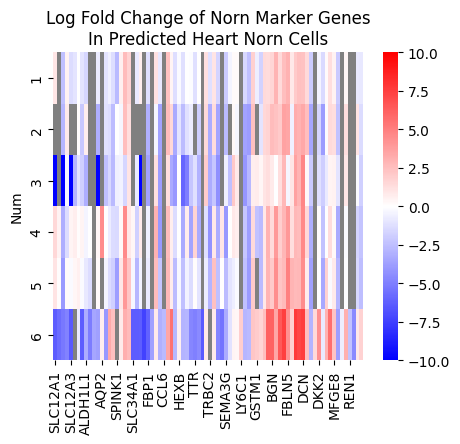

In [31]:
plt.figure(figsize=(5, 4))
g = sns.heatmap(df_to_plot.set_index("Num"), cmap="bwr", vmax=10, vmin=-10)
plt.title("Log Fold Change of Norn Marker Genes\nIn Predicted Heart Norn Cells");
g.set_facecolor('grey')
plt.xticks(rotation=90);

plt.savefig("figures/heart_heatmap_new.svg")

In [32]:
df_to_plot_heart = df_to_plot

# Make them Joint

In [33]:
df_to_plot = pd.concat((df_to_plot_lung, df_to_plot_heart.iloc[[0], :], df_to_plot_heart)).set_index("Num")

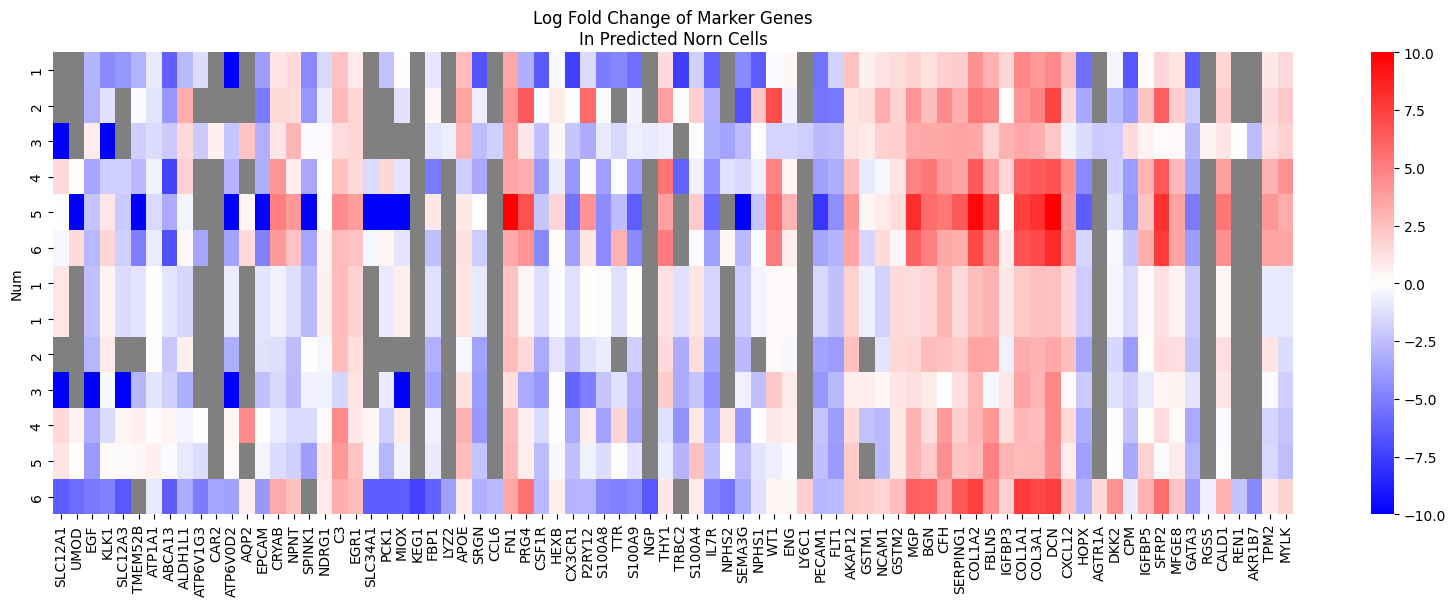

In [35]:
plt.figure(figsize=(20, 6))
g = sns.heatmap(df_to_plot, cmap="bwr", vmax=10, vmin=-10)
plt.title("Log Fold Change of Marker Genes\nIn Predicted Norn Cells");
g.set_facecolor('grey')
plt.xticks(rotation=90);

plt.savefig("figures/hrtlng_heatmap_new.svg")